In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.0000, high=90.0000, size=1500)
lngs = np.random.uniform(low=-180.0000, high=180.0000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Import the citipy module
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

# Import Dependencies, and Initialize an Empty List and Counters

In [13]:
# Import Requests Library and the weather_api_key.
import requests
# Import the API key
from config import weather_api_key

# Build basic URL + API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eba3522468d0a8ca6a2240c33ed79c78"

# Import the datetime module from the datetime library.
from datetime import datetime


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nanortalik
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | chongoyape
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | aktau
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | mullaitivu
City not found. Skipping...
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | hambantota

In [15]:
len(city_data)

573

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.14,-45.24,44.29,83,4,6.80,GL,2020-08-26 02:15:58
1,Rikitea,-23.12,-134.97,70.43,70,0,7.56,PF,2020-08-26 02:18:51
2,Dikson,73.51,80.55,47.01,94,27,6.96,RU,2020-08-26 02:18:51
3,Hilo,19.73,-155.09,84.20,62,1,10.29,US,2020-08-26 02:18:51
4,Avarua,-21.21,-159.78,77.00,73,23,6.93,CK,2020-08-26 02:16:22
5,Chongoyape,-6.64,-79.39,65.10,61,2,1.59,PE,2020-08-26 02:18:52
6,Lebu,-37.62,-73.65,50.97,83,84,21.88,CL,2020-08-26 02:18:52
7,Atuona,-9.80,-139.03,78.82,72,28,10.85,PF,2020-08-26 02:18:53
8,Bethel,41.37,-73.41,73.40,64,1,4.70,US,2020-08-26 02:16:23
9,Bredasdorp,-34.53,20.04,46.40,87,99,5.82,ZA,2020-08-26 02:18:53


In [20]:
# Reorder Columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_datanew_df = city_data_df[new_column_order]

In [21]:
city_datanew_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nanortalik,GL,2020-08-26 02:15:58,60.14,-45.24,44.29,83,4,6.80
1,Rikitea,PF,2020-08-26 02:18:51,-23.12,-134.97,70.43,70,0,7.56
2,Dikson,RU,2020-08-26 02:18:51,73.51,80.55,47.01,94,27,6.96
3,Hilo,US,2020-08-26 02:18:51,19.73,-155.09,84.20,62,1,10.29
4,Avarua,CK,2020-08-26 02:16:22,-21.21,-159.78,77.00,73,23,6.93
5,Chongoyape,PE,2020-08-26 02:18:52,-6.64,-79.39,65.10,61,2,1.59
6,Lebu,CL,2020-08-26 02:18:52,-37.62,-73.65,50.97,83,84,21.88
7,Atuona,PF,2020-08-26 02:18:53,-9.80,-139.03,78.82,72,28,10.85
8,Bethel,US,2020-08-26 02:16:23,41.37,-73.41,73.40,64,1,4.70
9,Bredasdorp,ZA,2020-08-26 02:18:53,-34.53,20.04,46.40,87,99,5.82


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV
city_datanew_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [35]:
# Import the time module
import time
# Get today's date in seconds
today = time.time()
today = time.strftime("%x")
today

'08/25/20'

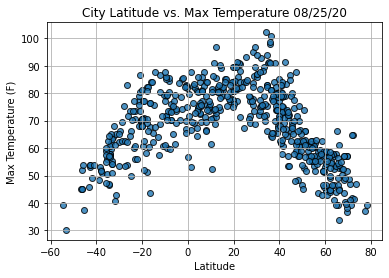

In [36]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

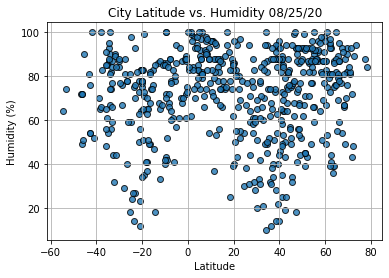

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

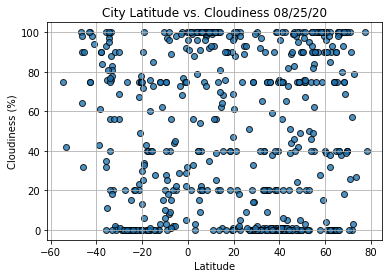

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

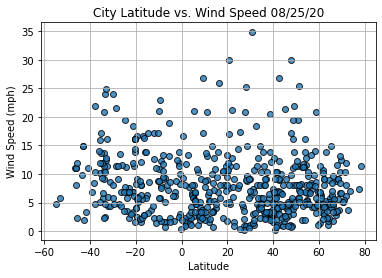

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()